In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
df = pd.read_csv('12. Seaborn_Batsman.csv')

In [4]:
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset shape: (208, 7)

First few rows:


,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [5]:
print("\nData information:")
df.info()



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [6]:
df['StrikeRate'] = (df['RunsScored'] / df['BallsFaced']) * 100

In [7]:
print("\nDescriptive statistics:")
display(df.describe())


Descriptive statistics:


,RunsScored,BallsFaced,BattingPosition,Inning,Year,StrikeRate
count,208.000000,208.000000,208.000000,208.000000,208.000000,207.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385,79.354420
std,43.797641,39.850548,0.781602,0.496644,2.750477,36.785902
min,0.000000,0.000000,1.000000,1.000000,2008.000000,0.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000,61.507937
50%,35.000000,46.500000,3.000000,2.000000,2013.000000,80.281690
75%,81.250000,83.250000,3.000000,2.000000,2015.000000,100.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000,209.090909


In [8]:
yearly_avg = df.groupby('Year')['RunsScored'].mean().reset_index()
yearly_avg.columns = ['Year', 'AverageRuns']


In [9]:
dismissal_counts = df['Dismissal'].value_counts()
print("\nDismissal Distribution:")
print(dismissal_counts)


Dismissal Distribution:
Dismissal
Caught        121
NO             37
Bowled         21
Run out        12
LBW            12
Stumped         4
Hit wicket      1
Name: count, dtype: int64


In [10]:
opposition_performance = df.groupby('Opposition')['RunsScored'].agg(['mean', 'max', 'count']).reset_index()
opposition_performance.columns = ['Opposition', 'AverageRuns', 'HighestScore', 'Innings']
print("\nPerformance against different oppositions:")
display(opposition_performance.sort_values(by='AverageRuns', ascending=False))


Performance against different oppositions:


,Opposition,AverageRuns,HighestScore,Innings
5,New Zealand,60.736842,154,19
1,Bangladesh,59.454545,136,11
10,West Indies,57.500000,157,32
7,South Africa,52.875000,160,24
8,Sri Lanka,48.577778,139,45
0,Australia,45.461538,118,26
11,Zimbabwe,42.166667,115,6
3,Ireland,39.000000,44,2
2,England,38.344828,122,29
6,Pakistan,38.250000,183,12


In [11]:
position_performance = df.groupby('BattingPosition')['RunsScored'].agg(['mean', 'max', 'count']).reset_index()
position_performance.columns = ['BattingPosition', 'AverageRuns', 'HighestScore', 'Innings']
print("\nPerformance by batting position:")
display(position_performance)


Performance by batting position:


,BattingPosition,AverageRuns,HighestScore,Innings
0,1,36.666667,54,3
1,2,17.000000,37,3
2,3,52.173077,183,156
3,4,47.135135,139,37
4,5,31.750000,80,4
5,6,23.000000,23,1
6,7,9.500000,27,4


In [12]:
centuries = len(df[df['RunsScored'] >= 100])
half_centuries = len(df[(df['RunsScored'] >= 50) & (df['RunsScored'] < 100)])

In [13]:
print(f"\nTotal Centuries: {centuries}")
print(f"Total Half-Centuries: {half_centuries}")



Total Centuries: 38
Total Half-Centuries: 48


In [14]:
avg_strike_rate = df['StrikeRate'].mean()
print(f"\nAverage Strike Rate: {avg_strike_rate:.2f}")



Average Strike Rate: 79.35


In [15]:
inning_performance = df.groupby('Inning')['RunsScored'].agg(['mean', 'max', 'count']).reset_index()
inning_performance.columns = ['Inning', 'AverageRuns', 'HighestScore', 'Count']
print("\nInning Performance:")
print(inning_performance)


Inning Performance:
   Inning  AverageRuns  HighestScore  Count
0       1    45.111111           160     90
1       2    52.305085           183    118


In [16]:
print("\nYearly Performance:")
print(yearly_avg)



Yearly Performance:
    Year  AverageRuns
0   2008    31.800000
1   2009    40.625000
2   2010    41.458333
3   2011    40.617647
4   2012    60.352941
5   2013    42.266667
6   2014    52.700000
7   2015    31.150000
8   2016    73.900000
9   2017    56.153846
10  2018    85.857143


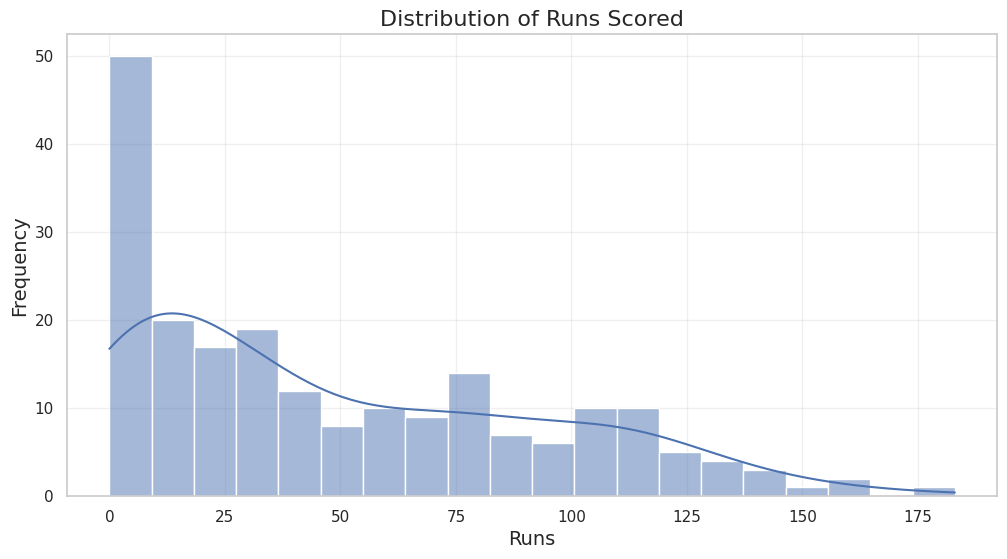

In [17]:
# 1. Runs Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['RunsScored'], bins=20, kde=True)
plt.title('Distribution of Runs Scored', fontsize=16)
plt.xlabel('Runs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

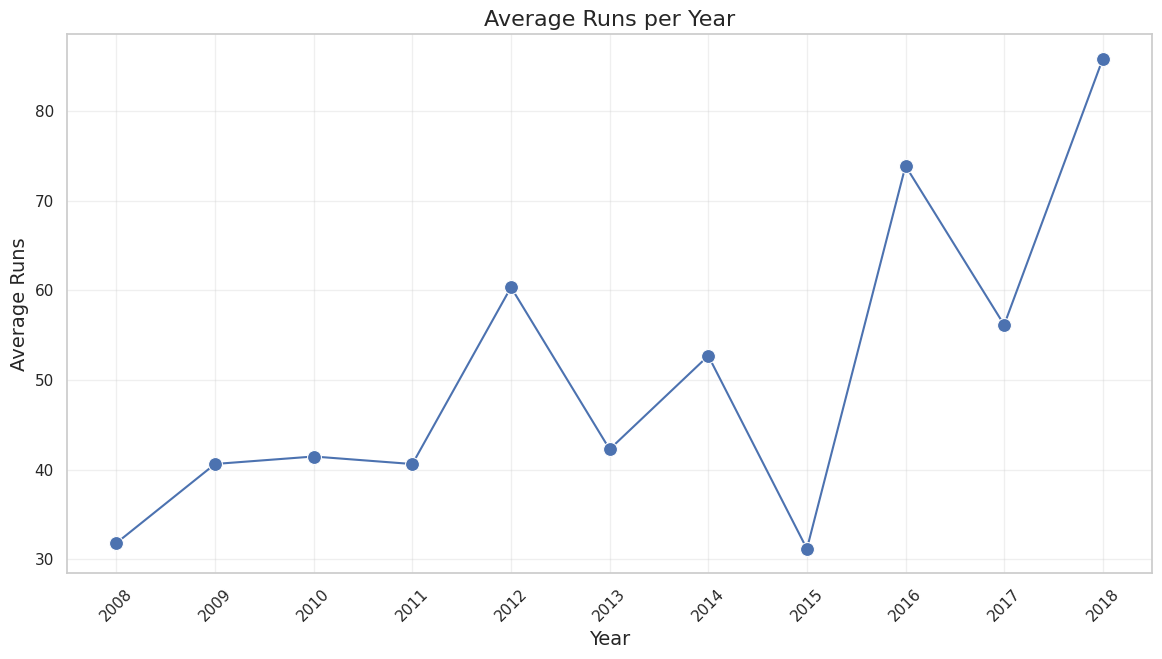

In [18]:
# 2. Yearly Performance Trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='AverageRuns', data=yearly_avg, marker='o', markersize=10)
plt.title('Average Runs per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(yearly_avg['Year'], rotation=45)
plt.show()

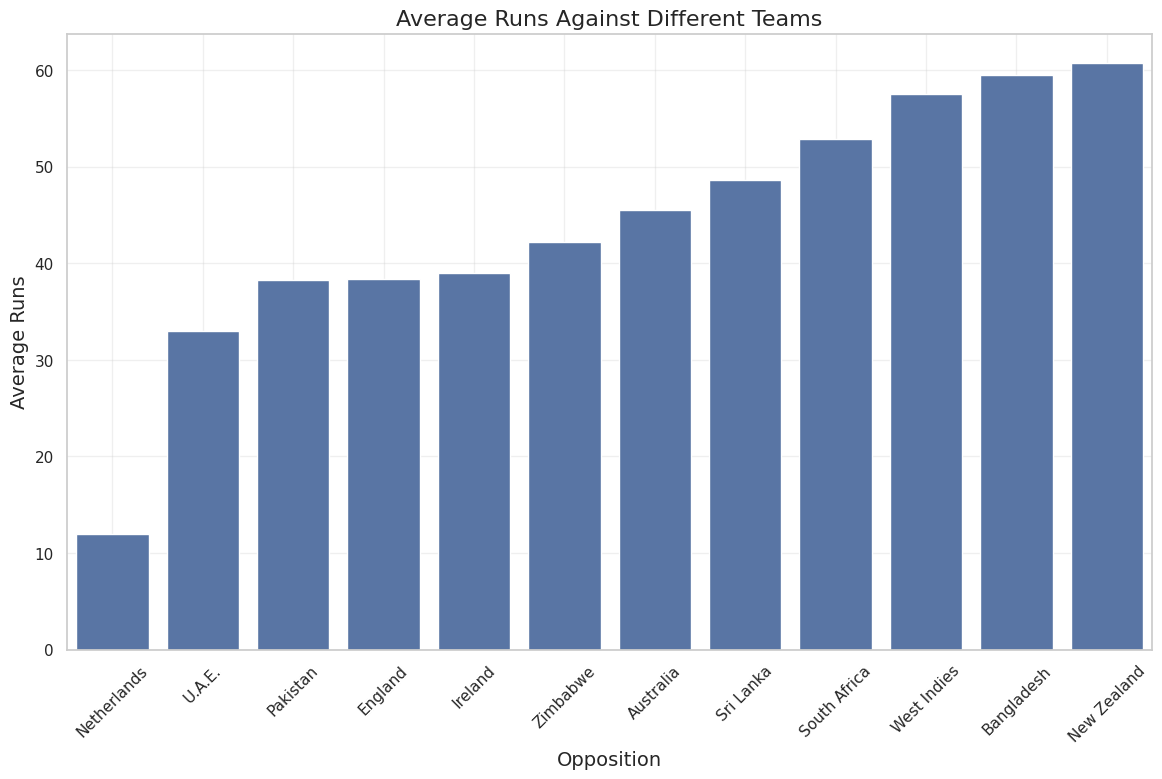

In [19]:
# 3. Performance against different oppositions
plt.figure(figsize=(14, 8))
opposition_performance_sorted = opposition_performance.sort_values(by='AverageRuns')
bar_plot = sns.barplot(x='Opposition', y='AverageRuns', data=opposition_performance_sorted)
plt.title('Average Runs Against Different Teams', fontsize=16)
plt.xlabel('Opposition', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [20]:
# Add data labels on bars
for i, v in enumerate(opposition_performance_sorted['AverageRuns']):
    bar_plot.text(i, v + 1, f"{v:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()



<Figure size 1200x800 with 0 Axes>

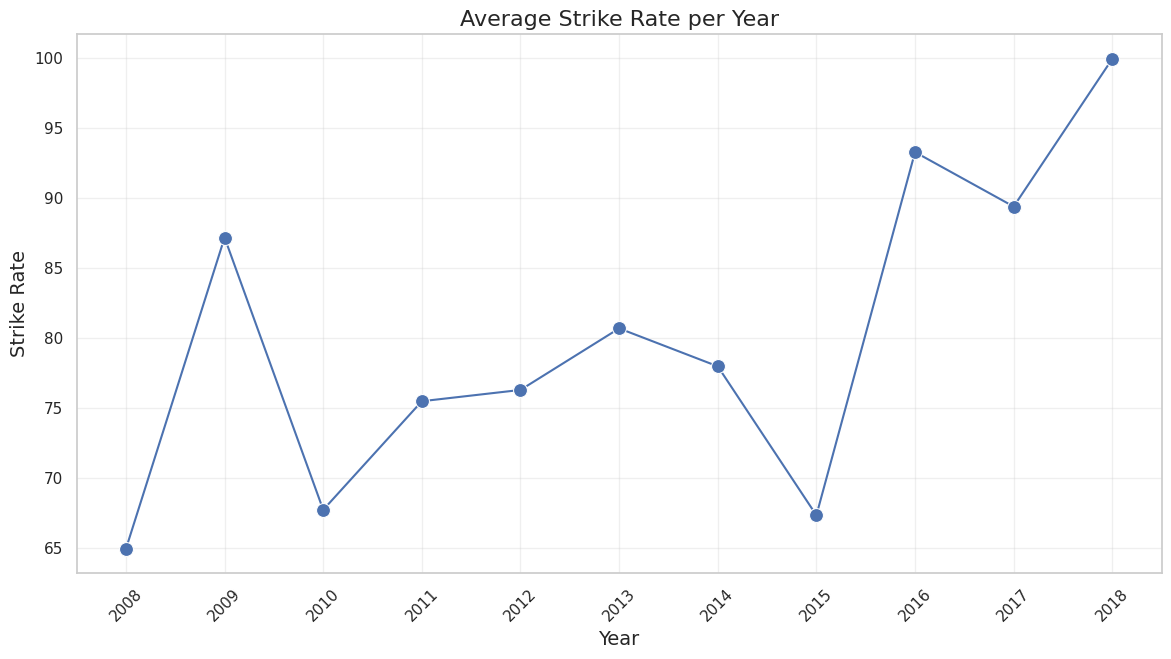

In [21]:
# 4. Strike Rate by Year
df_yearly_sr = df.groupby('Year')['StrikeRate'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='StrikeRate', data=df_yearly_sr, marker='o', markersize=10)
plt.title('Average Strike Rate per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(df_yearly_sr['Year'], rotation=45)
plt.show()

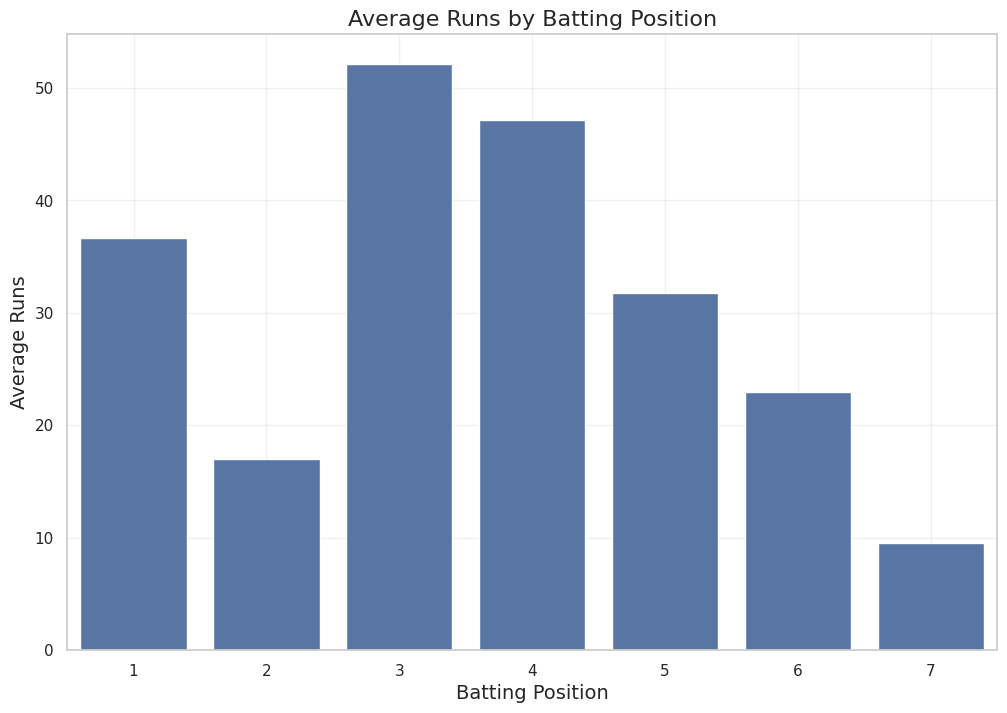

In [22]:
# 5. Batting Position Performance
plt.figure(figsize=(12, 8))
position_perf = df.groupby('BattingPosition')['RunsScored'].mean().reset_index()
sns.barplot(x='BattingPosition', y='RunsScored', data=position_perf)
plt.title('Average Runs by Batting Position', fontsize=16)
plt.xlabel('Batting Position', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

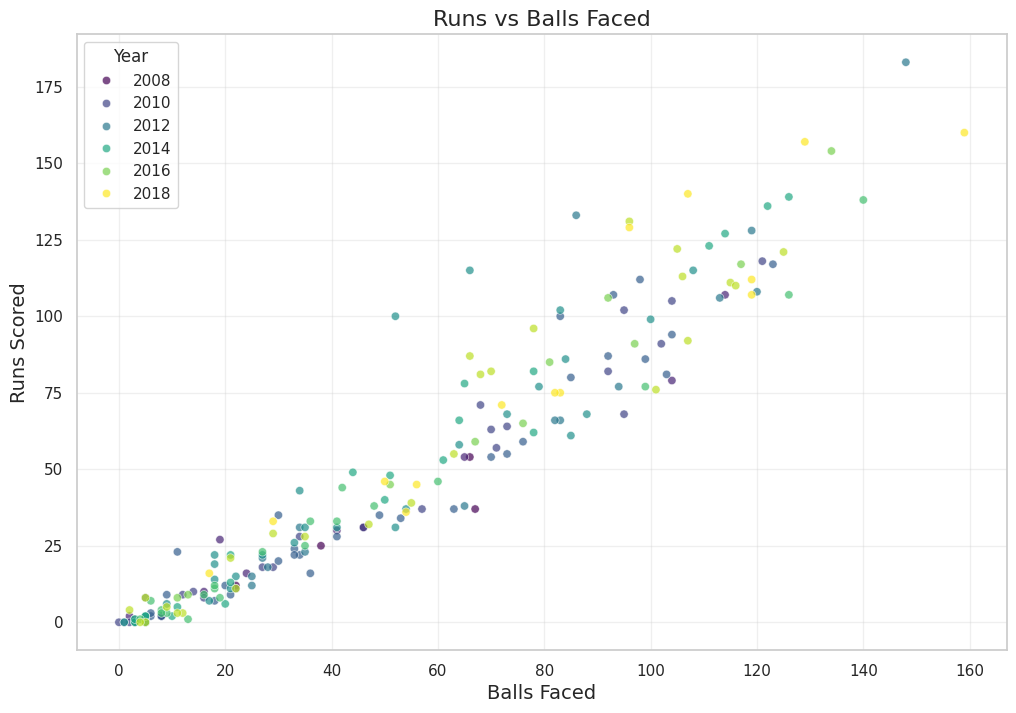

In [23]:
# 6. Runs vs Balls Faced Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='BallsFaced', y='RunsScored', data=df, hue='Year', palette='viridis', alpha=0.7)
plt.title('Runs vs Balls Faced', fontsize=16)
plt.xlabel('Balls Faced', fontsize=14)
plt.ylabel('Runs Scored', fontsize=14)
plt.grid(True, alpha=0.3)
